In [2]:
import numpy as np
import pylab as plt
from scipy import stats
import pymultinest
%load_ext autoreload
%autoreload 2

np.random.seed(25)

In [2]:
NDIM = 4 # number of parameters
SIGMA = 0.01

In [2]:
# A toy model with a diffuse and point source component

def model(z):
    grid = np.linspace(0, 1, 50, 50)
    X, Y = np.meshgrid(grid, grid)
    x0, y0, r, w = z[0], z[1], z[2]*0.4+0.2, z[3]*0.1+0.05
    
    R = ((X-x0)**2 + (Y-y0)**2)**0.5
    
    mu = np.exp(-(R-r)**2/w**2/2)
    x = mu
    return x

In [4]:
def noisemodel(x, z = None, noiselevel = 1.):
    n = np.random.randn(*x.shape)*SIGMA  #*noiselevel
    return x + n

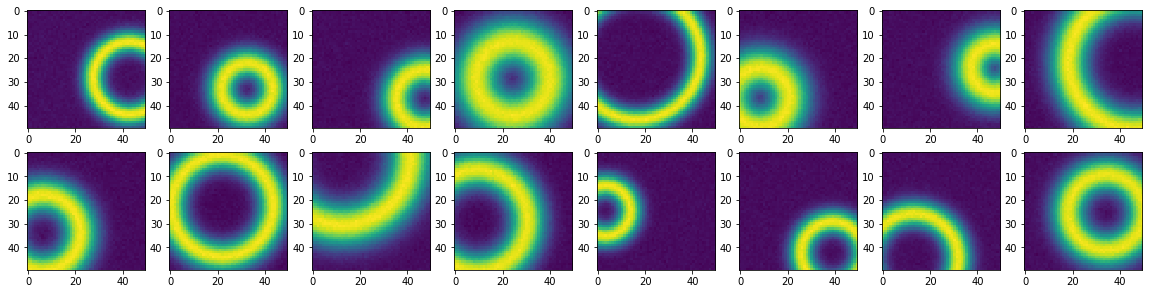

In [5]:
# Random image realizations

plt.figure(figsize=(20, 10))
for i in range(16):
    plt.subplot(4, 8, i+1)
    z = np.random.rand(5)
    x = model(z)
    x = noisemodel(x)
    plt.imshow(x)

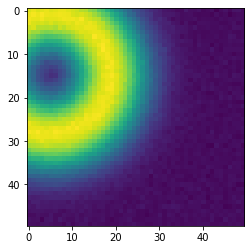

In [6]:
z0 = np.array([0.1, 0.3, 0.2, 0.8])
x0 = noisemodel(model(z0))
plt.imshow(x0)

In [7]:
# Fisher analysis
grad = []

for i in range(0, NDIM):
    dz = np.zeros(NDIM)
    d = 0.001
    dz[i] += d
    g = (model(z0+dz) - model(z0))/d
    grad.append(g)

I = np.zeros((NDIM, NDIM))

for i in range(NDIM):
    for j in range(NDIM):
        I[i, j] = (grad[i]*grad[j]).sum()/SIGMA**2
        
        
Cov = np.linalg.inv(I)
err = np.diag(Cov)**0.5
print(err)

[0.00018608 0.0001329  0.00031023 0.00085264]


In [3]:
def myprior(cube, ndim, nparams):
    for i in range(ndim):
        cube[i] = cube[i] * 10 * math.pi

def myloglike(cube, ndim, nparams):
    chi = 1.
    for i in range(ndim):
        chi *= math.cos(cube[i] / 2.)
    return math.pow(2. + chi, 5)

In [4]:
parameters = ["x", "y"]
n_params = len(parameters)

In [ ]:
pymultinest.run(myloglike, myprior, n_params, resume = True, verbose = False);